# Name : Asad ullah
# Batch : DS2312

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [85]:
df= pd.read_csv('medical_cost_insurance.csv')

In [86]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains the details of patients in which both numerical and categorical data presents. Here Charges is the target variable which contains continous values so it will be termerd as regression where we need to predict several prices using regression models



In [87]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# EDA

In [88]:
df.shape

(1338, 7)

Data set contains of 1338 rows and 7 columns

In [89]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [90]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As we can see there are numerical and categorical data present in dataset

In [91]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null in the datset

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

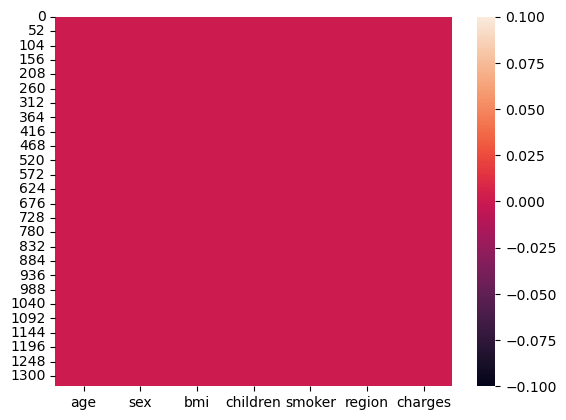

In [93]:
sns.heatmap(df.isnull())

In [94]:
#Checking values if each column
for i in df.columns:
    print(df[i].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

No null values and no blank spaces

In [95]:
#Checking for categorical columns
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")


#Checking for Numerical columns
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']




In [96]:
#Checking number of unique values in each column
df.nunique().to_frame("No of unique Values")

,No of unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [97]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As the mean values is greater than 50% in charges it means data is skwewd toward right

**Univariate Analysis**

sex
male      676
female    662
Name: count, dtype: int64


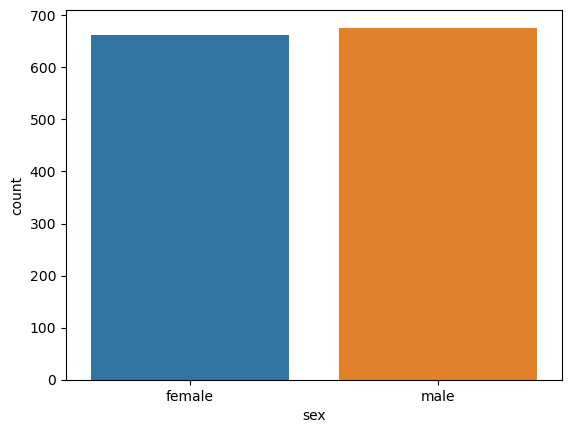

In [98]:
ax= sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())


smoker
no     1064
yes     274
Name: count, dtype: int64


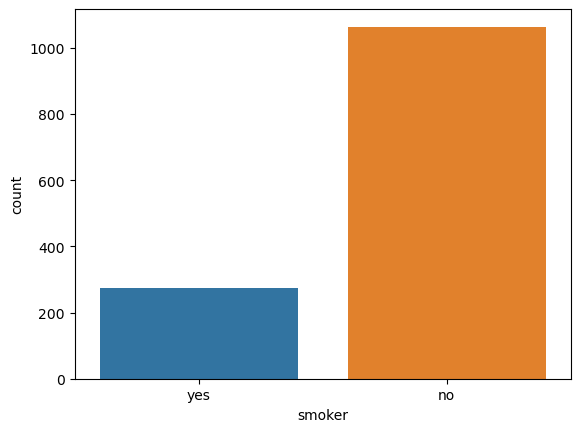

In [99]:
ax= sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


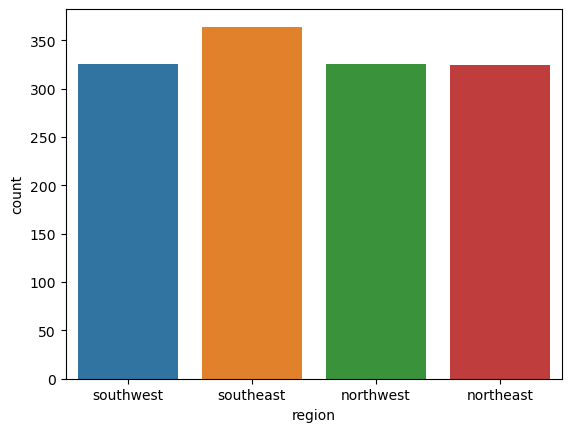

In [100]:
ax= sns.countplot(x='region', data=df)
print(df['region'].value_counts())


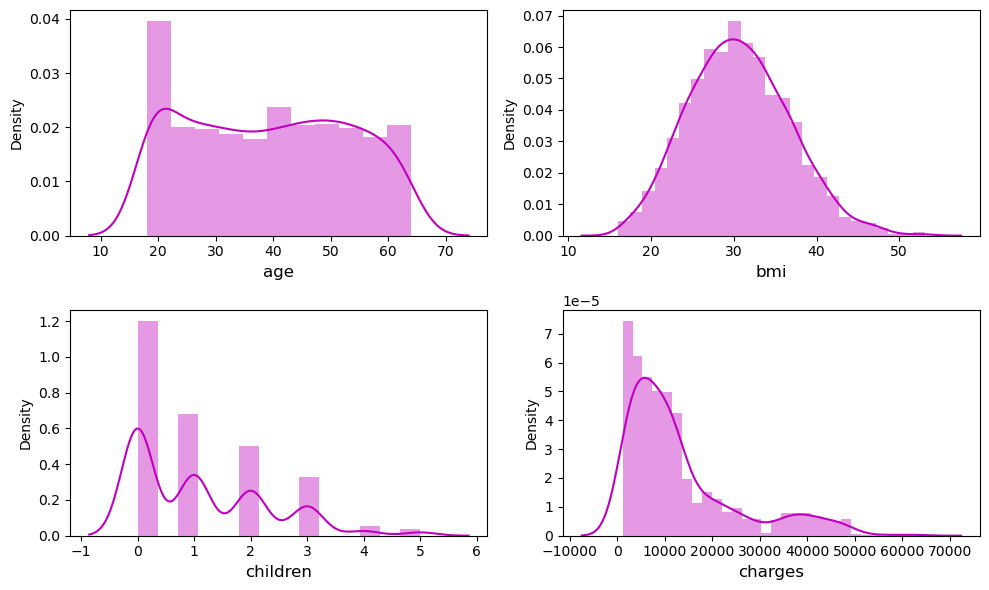

In [101]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we can see data is normal in all columns except charges there skewness in charges  column

In [102]:
Skewed_column = df['charges']

# Apply a logarithmic transformation to the skewed column
transformed_column = np.log(Skewed_column)

# Update the original column with the transformed values
df['charges'] = transformed_column

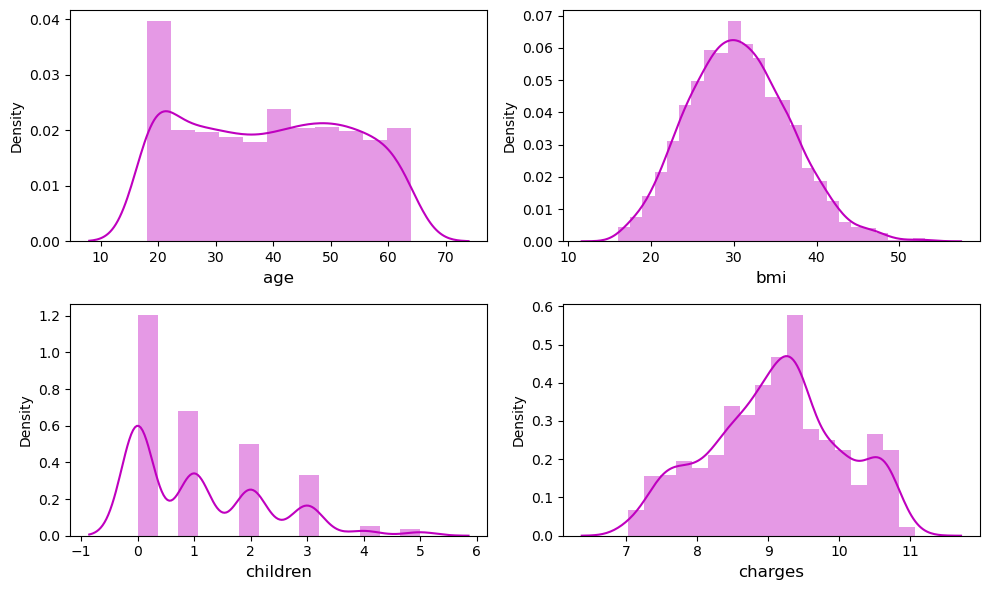

In [103]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we can see now skewed removed from charges clumn now

**BiVariate Analysis**

<Axes: title={'center': 'Comaprison of smoker and charges'}, xlabel='smoker', ylabel='charges'>

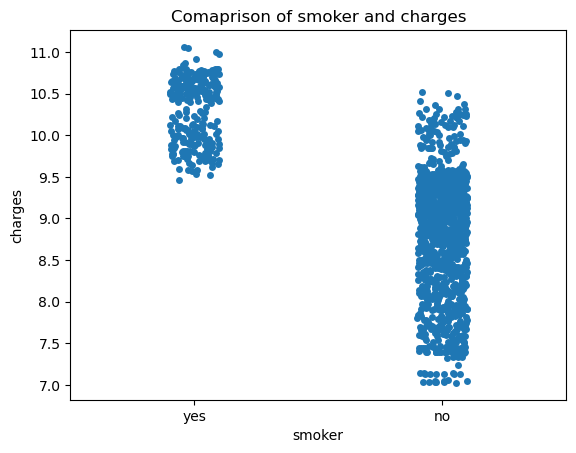

In [104]:
#Comparison of age and charges
plt.title("Comaprison of smoker and charges")
sns.stripplot(x='smoker', y='charges', data=df)

<Axes: title={'center': 'Comaprison of sex and charges'}, xlabel='sex', ylabel='charges'>

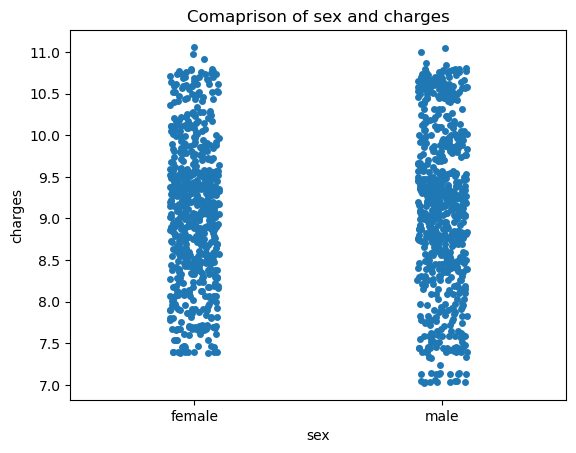

In [105]:
#Comparison of sex and charges
plt.title("Comaprison of sex and charges")
sns.stripplot(x='sex', y='charges', data=df)

<Axes: title={'center': 'Comaprison of children and charges'}, xlabel='children', ylabel='charges'>

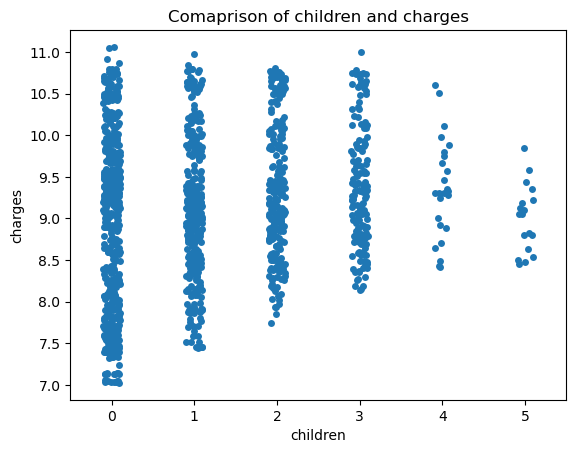

In [106]:
#Comparison of sex and charges
plt.title("Comaprison of children and charges")
sns.stripplot(x='children', y='charges', data=df)

<Axes: title={'center': 'Comaprison of children and charges'}, xlabel='region', ylabel='charges'>

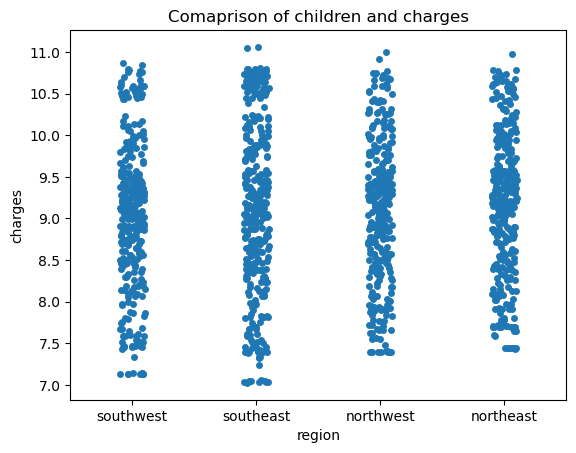

In [107]:
#Comparison of region and charges
plt.title("Comaprison of children and charges")
sns.stripplot(x='region', y='charges', data=df)

# Encoding Categorical Columns


In [108]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,9.734176
1,18,1.0,33.770,1,0.0,2.0,7.453302
2,28,1.0,33.000,3,0.0,2.0,8.400538
3,33,1.0,22.705,0,0.0,1.0,9.998092
4,32,1.0,28.880,0,0.0,1.0,8.260197
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,9.268661
1334,18,0.0,31.920,0,0.0,0.0,7.698927
1335,18,0.0,36.850,0,0.0,2.0,7.396233
1336,21,0.0,25.800,0,0.0,3.0,7.604867


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


**Check Outliers**

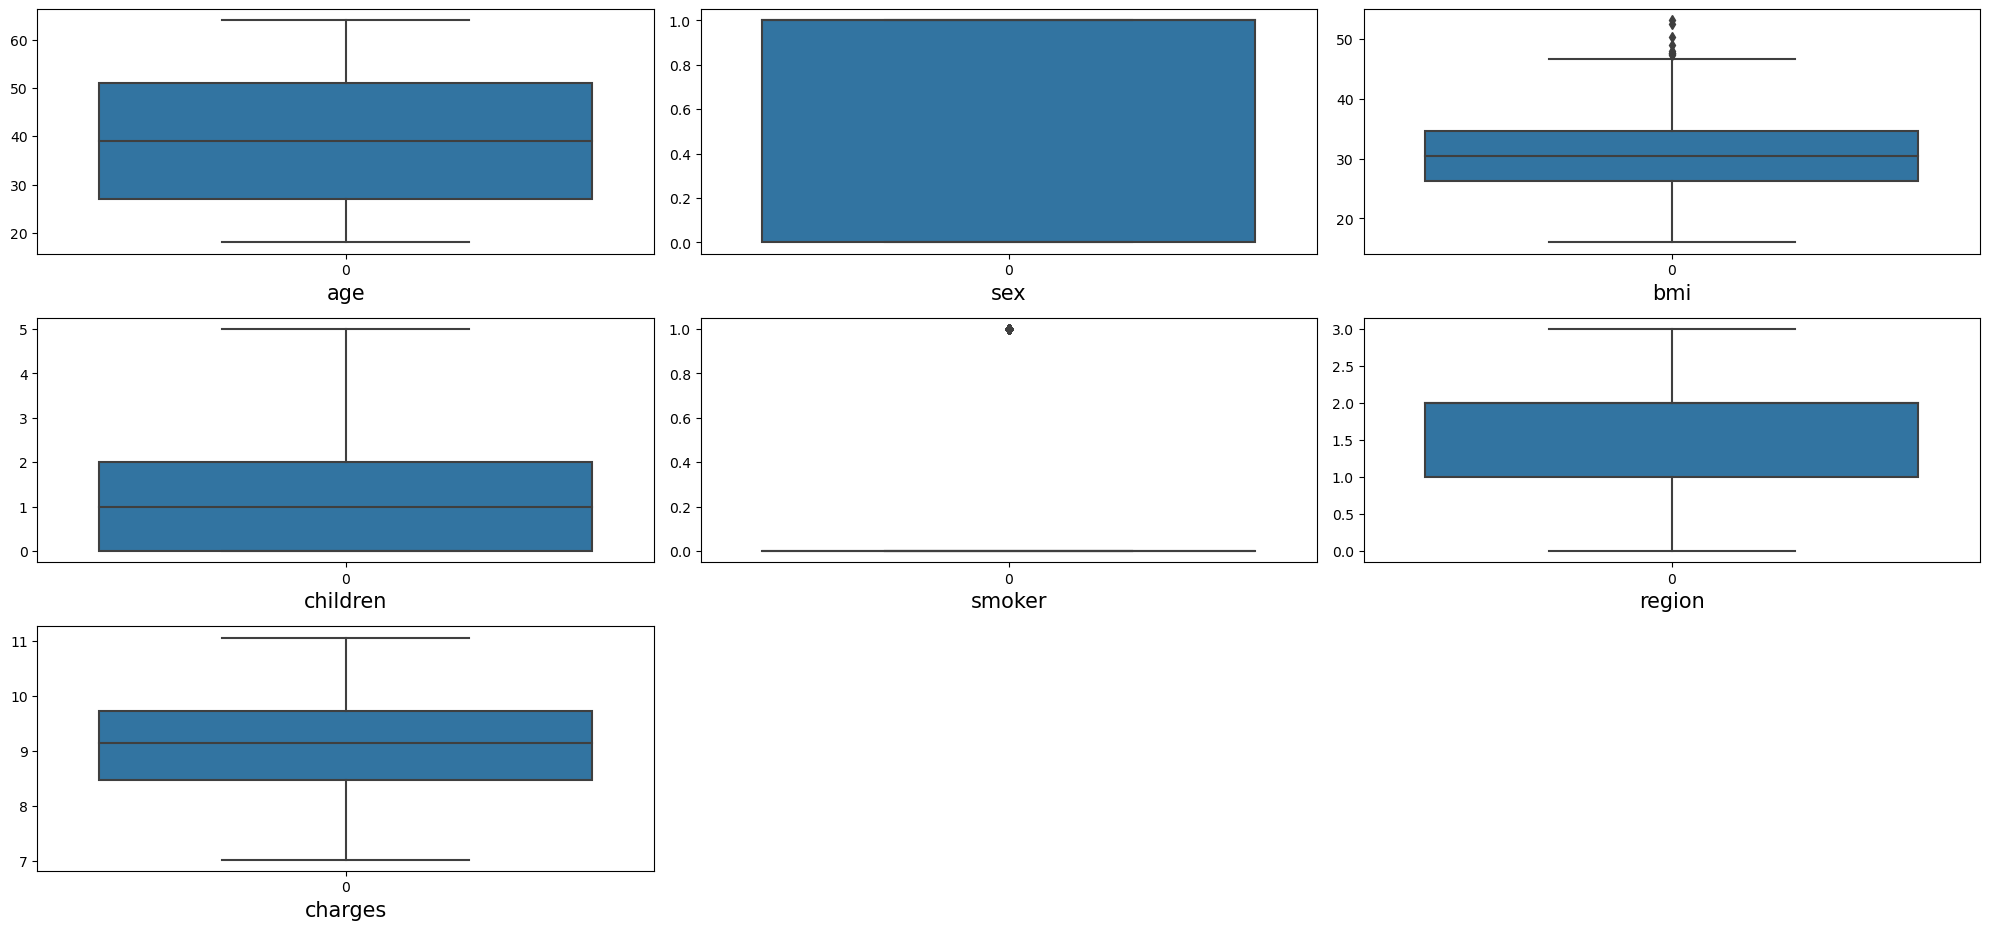

In [110]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

We see Outlier only in bmi column

In [111]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data

filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3

df= df[filtering_entry]

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,39.283435,0.503040,30.615186,1.043313,0.206687,1.506839,9.101128
std,14.076955,0.500181,5.985924,1.124403,0.405083,1.104756,0.922483
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,7.022756
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,8.459393
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9.149843
75%,51.000000,1.000000,34.618750,2.000000,0.000000,2.000000,9.736511
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,11.063045


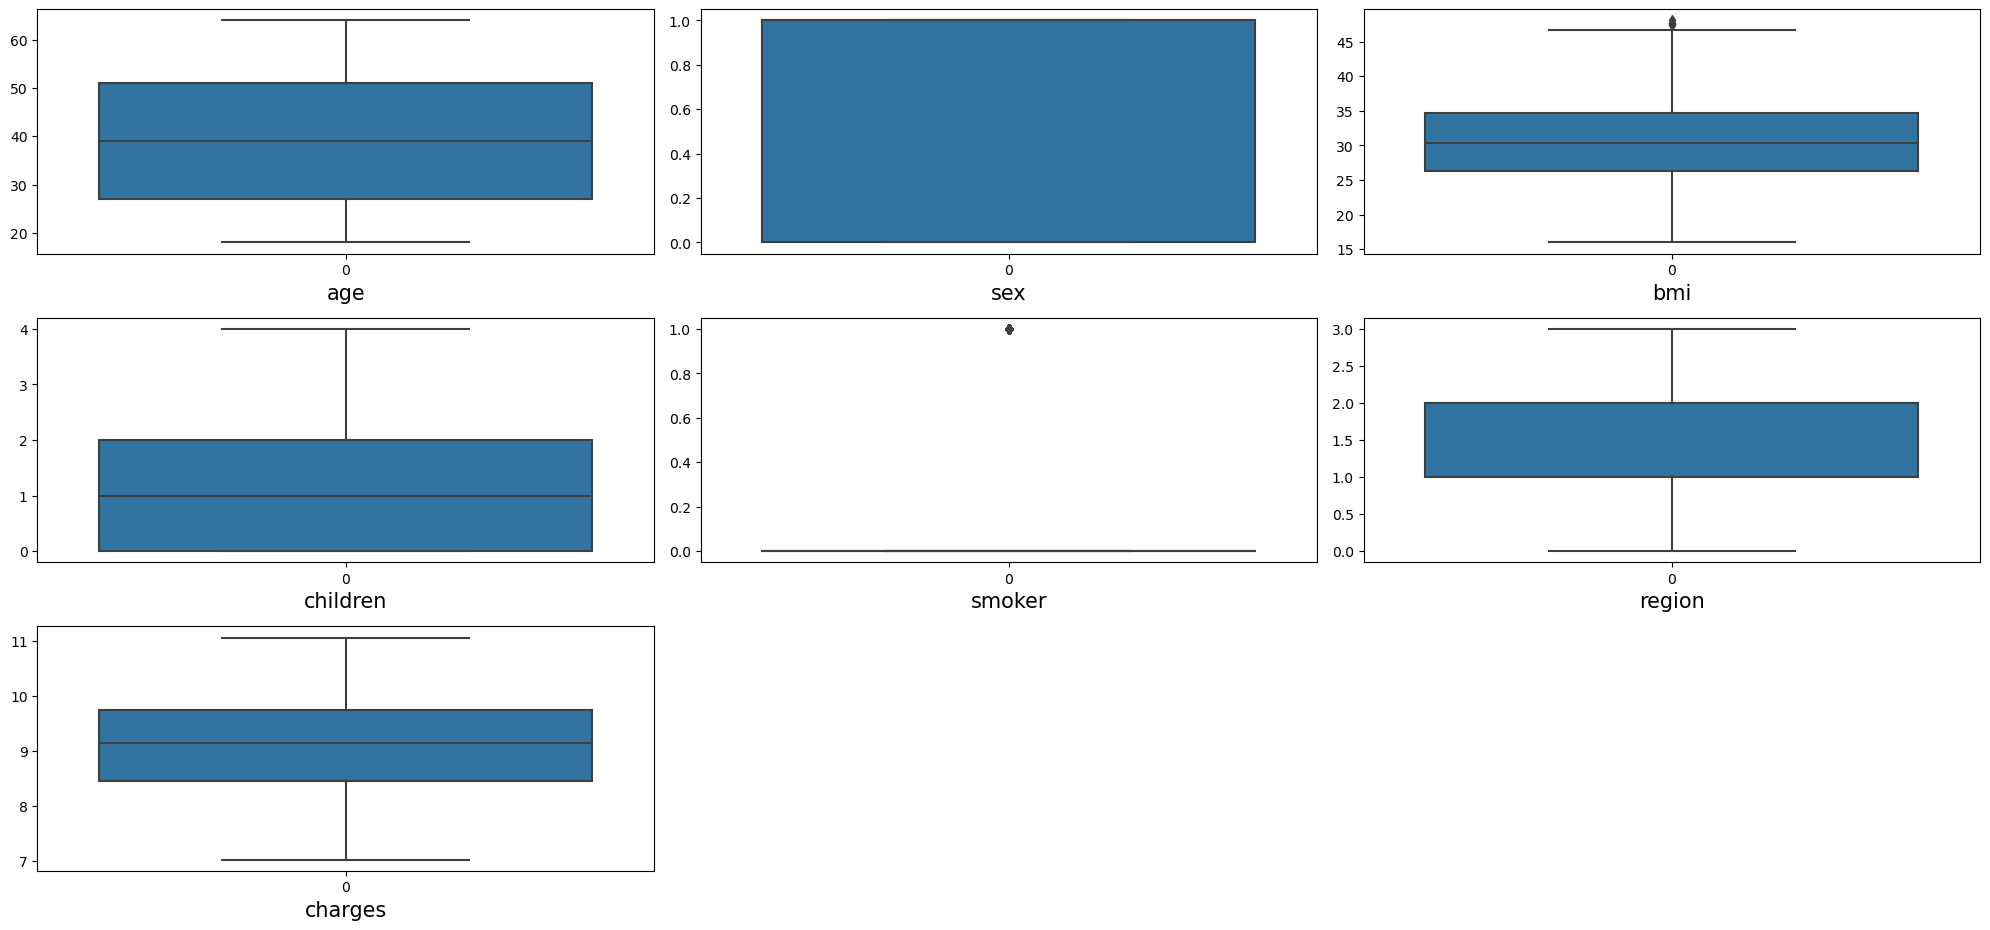

In [112]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

It is almost Outlier removed from bmi column now 

In [113]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.058319,-0.025751,0.004741,0.527653
sex,-0.017673,1.000000,0.039934,0.015315,0.079468,0.006155,0.008390
bmi,0.119062,0.039934,1.000000,0.027706,0.004988,0.159535,0.142239
children,0.058319,0.015315,0.027706,1.000000,0.025409,-0.004830,0.179030
smoker,-0.025751,0.079468,0.004988,0.025409,1.000000,-0.001462,0.665991
region,0.004741,0.006155,0.159535,-0.004830,-0.001462,1.000000,-0.042243
charges,0.527653,0.008390,0.142239,0.179030,0.665991,-0.042243,1.000000


<Axes: >

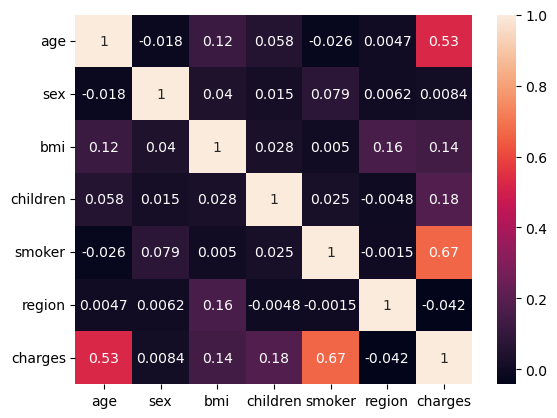

In [114]:
sns.heatmap(df.corr(), annot=True)

We see moderate corelation between charges and sex, smoker and charge, age and charges

**Separating label and features**

In [115]:
x= df.drop("charges", axis=1)
y= df['charges']

**Feature scaling using Stndard Scalar**

In [116]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


# Model Building

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [123]:
#Finding the best Random State
MaxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu= acc
        maxRs=i
print("Maximum r2 score is ", MaxAccu, "On random state", maxRs)

Maximum r2 score is  0.8206456149557433 On random state 11


In [124]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=maxRs)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


In [127]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred_lr= lr.predict(x_test)
pred_train= lr.predict(x_train)
print('R2_score', r2_score(y_test, pred_lr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error', mean_squared_error(y_test, pred_lr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2_score 0.8206456149557433
R2_score on training 74.1780836048529
Mean Absolute Error 0.27094456157566515
Mean Squared Error 0.1581227008940755
Root mean Squared Error 0.3976464521331424


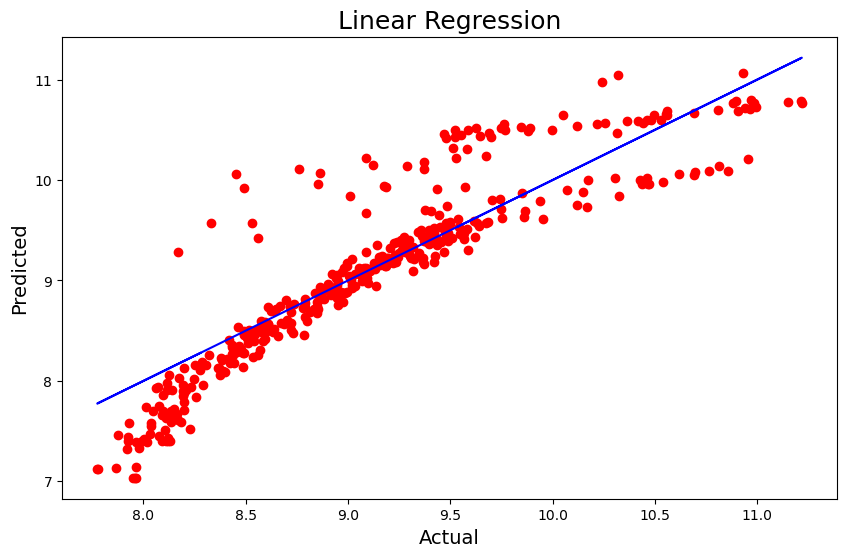

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr, y=y_test, color='r')
plt.plot(pred_lr, pred_lr, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [129]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf= rf.predict(x_test)
pred_train= rf.predict(x_train)
print('R2_score', r2_score(y_test, pred_rf))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error', mean_squared_error(y_test, pred_rf))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rf)))

R2_score 0.8493797639138302
R2_score on training 96.88367720664881
Mean Absolute Error 0.2182633561138029
Mean Squared Error 0.1327900543573084
Root mean Squared Error 0.3644036969588926


In [130]:
knn= KNN()
knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error', mean_squared_error(y_test, pred_knn))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score 0.8519323080008534
R2_score on training 83.82719386756602
Mean Absolute Error 0.2391804792259176
Mean Squared Error 0.13053967634122748
Root mean Squared Error 0.3613027488702895


In [132]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt= dt.predict(x_test)
pred_train= dt.predict(x_train)
print('R2_score', r2_score(y_test, pred_dt))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error', mean_squared_error(y_test, pred_dt))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2_score 0.6373754713492095
R2_score on training 100.0
Mean Absolute Error 0.2734812966589615
Mean Squared Error 0.31969761913853
Root mean Squared Error 0.5654180923339206


In [173]:
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb= gb.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_gb))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error', mean_squared_error(y_test, pred_gb))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2_score 0.8894672754848358
R2_score on training 86.88774174441585
Mean Absolute Error 0.20282519054025125
Mean Squared Error 0.0974480380460495
Root mean Squared Error 0.3121666831134442


In [174]:
er= ExtraTreeRegressor()
er.fit(x_train, y_train)
pred_er= er.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_er))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_er))
print('Mean Squared Error', mean_squared_error(y_test, pred_er))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_er)))

R2_score 0.7115815858459602
R2_score on training 86.88774174441585
Mean Absolute Error 0.22406333368557813
Mean Squared Error 0.2542759053388597
Root mean Squared Error 0.5042577766766316


In [175]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error', mean_squared_error(y_test, pred_svr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_svr)))


R2_score 0.9182313345158112
R2_score on training 86.88774174441585
Mean Absolute Error 0.13963253077510432
Mean Squared Error 0.07208902214280227
Root mean Squared Error 0.26849398902545707


In [176]:
rr= Ridge()
rr.fit(x_train, y_train)
pred_rr=rr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_rr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rr))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rr)))

R2_score 0.8204980666228484
R2_score on training 86.88774174441585
Mean Absolute Error 0.2711506300697973
Mean Squared Error 0.15825278269220935
Root mean Squared Error 0.3978099831479966


# Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score

In [142]:
score= cross_val_score(knn,x,y, cv=5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_knn)-score.mean())*100)

[0.84907092 0.69748156 0.84794432 0.81207989 0.79081853]
0.7994790451017344
Difference between R2 score and cross validation score is  5.2453262899119


In [146]:
score1= cross_val_score(lr,x,y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_lr)-score.mean())*100)

[0.79695725 0.6879537  0.83213472 0.76538498 0.735755  ]
0.7636371302746746
Difference between R2 score and cross validation score is  2.1166569854008888


In [147]:
score2= cross_val_score(rf,x,y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rf)-score.mean())*100)

[0.8536117  0.70525093 0.85860062 0.81791741 0.78566608]
0.8042093470157926
Difference between R2 score and cross validation score is  4.990071881209579


In [149]:
score3= cross_val_score(dt,x,y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_dt)-score.mean())*100)

[0.73482465 0.57499638 0.56244048 0.68613733 0.55419769]
0.6225193058769707
Difference between R2 score and cross validation score is  -16.210357375252492


In [150]:
score4= cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_gb)-score.mean())*100)

[0.87217968 0.73272394 0.9020813  0.83969986 0.80408488]
0.8301539308900538
Difference between R2 score and cross validation score is  9.006448262294365


In [156]:
score5= cross_val_score(er,x,y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_er)-score.mean())*100)

[0.69943665 0.60772065 0.69477771 0.66716446 0.70717839]
0.6752555718800101
Difference between R2 score and cross validation score is  -17.81592735520514


In [158]:
score6= cross_val_score(svr,x,y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_svr)-score.mean())*100)

[0.89416266 0.71562252 0.90971074 0.83379707 0.80514061]
0.83168671834718
Difference between R2 score and cross validation score is  11.875228941407679


In [162]:
score7= cross_val_score(rr,x,y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rr)-score.mean())*100)

[0.79691437 0.68807639 0.83198991 0.76542599 0.73579464]
0.7636402616416333
Difference between R2 score and cross validation score is  2.101902152111401


From the difference of both R2 and Croos validation score computed on R2 score conclude that SVR is best fitting and best performance model

# HyperParameter Tuning

In [163]:
from sklearn.model_selection import GridSearchCV

In [190]:
param_grid= {'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
    
}


In [191]:


gscv= GridSearchCV(SVR(),param_grid,cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [192]:
gscv.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [206]:
Model = SVR(C=1, gamma='auto', kernel='rbf')

In [207]:
Model.fit(x_train, y_train)
pred= Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.9181976858347759
R2_score on training 86.88774174441585
Mean Absolute Error 0.13960925115984202
Mean Squared Error 0.15825278269220935
Root mean Squared Error 0.268549227418362


# Saving model

In [208]:
import joblib
joblib.dump(Model, "MedicalInsurance")

['MedicalInsurance']

In [209]:
import pickle
filename= 'MedicalInsurance'
pickle.dump(Model, open(filename, 'wb'))